# Importing libraries and modules

In [85]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix


# EDA (Exploratory Data Analysis)

In [12]:
data = pd.read_csv('iphone_purchase_records.csv')

print("----------------------------\n")
print("The information of the Data" , data.info())
print("\n----------------------------")
data.head()

----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
The information of the Data None

----------------------------


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
print("----------------------------\n")
print("The Description of all the columns of the Data\n\n" , data.describe())
print("\n----------------------------")

----------------------------

The Description of all the columns of the Data

               Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000

----------------------------


In [9]:
print("----------------------------\n")
print("Check if there is any missing values in the data\n\n" , data.isnull().sum())
print("\n----------------------------")

----------------------------

Check if there is any missing values in the data

 Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

----------------------------


In [10]:
print("----------------------------\n")
print("Counts of values in column Gender\n\n" , data['Gender'].value_counts())
print("\n----------------------------")

----------------------------

Counts of values in column Gender

 Gender
Female    204
Male      196
Name: count, dtype: int64

----------------------------


# Encoding categorical gender column


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
print("Data after encoding the gender column\n\n" , data.head())

Data after encoding the gender column

    Gender  Age  Salary  Purchase Iphone
0       1   19   19000                0
1       1   35   20000                0
2       0   26   43000                0
3       0   27   57000                0
4       1   19   76000                0


# Correlation 

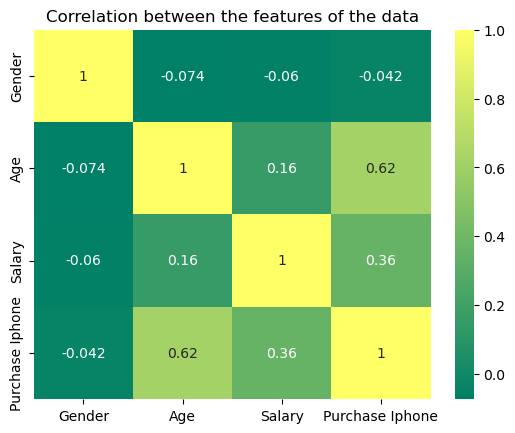

In [22]:
corr = data.corr()
sns.heatmap(corr , annot = True , cmap = 'summer')
plt.title("Correlation between the features of the data")
plt.savefig('Graphs/correlation.png')

# Distribution plots

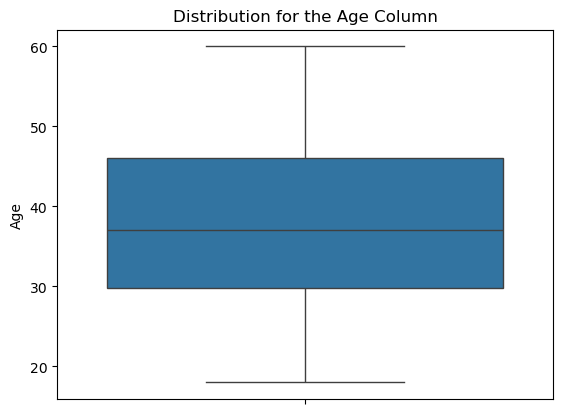

In [27]:
sns.boxplot(data['Age'])
plt.title("Distribution for the Age Column")
plt.savefig('Graphs/age.png')

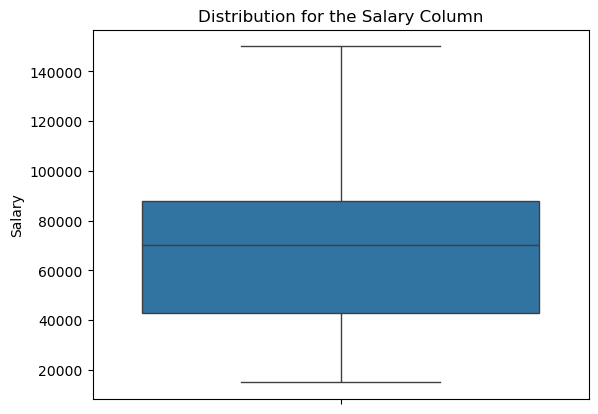

In [31]:
sns.boxplot(data['Salary'])
plt.title("Distribution for the Salary Column")
plt.savefig('Graphs/salary.png')

# Data Splitting

In [33]:
X = data.drop(['Purchase Iphone'] , axis = 1)
y = data['Purchase Iphone']

In [38]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size= 0.2 , random_state= 0)

In [40]:
print("Shape of training independant data " , X_train.shape)
print("Shape of testing independant data " , X_test.shape)

Shape of training independant data  (320, 3)
Shape of testing independant data  (80, 3)


# Scaling training and testing independent variables

In [60]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Model Fitting

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled , y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
knn.score(X_train_scaled , y_train)

0.91875

# Model Evaluation

In [78]:
y_pred = knn.predict(X_test_scaled)

In [79]:
pd.DataFrame(y_pred , y_test)

,0
Purchase Iphone,
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0


In [88]:
score = accuracy_score(y_pred , y_test)
cm= confusion_matrix(y_pred , y_test)

print("The accuracy_score of the model is :" , score)
print("The confusion matrix of the model is :\n" , cm)

The accuracy_score of the model is : 0.9375
The confusion matrix of the model is :
 [[54  1]
 [ 4 21]]
